## [예] 경기도에서 교통사망사고가 많은 5지역을 분석하여 도식화

(1) 발생지시도가 경기도 데이타셋 필터링

(2) 경기도내에서도 발생지시군구의 그룹핑

(3) 사망자수의 합계로 차트 만들기


In [1]:

%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글깨짐처리
font_loc = "c:/Windows/Fonts/malgun.ttf"
font_name=font_manager.FontProperties(fname=font_loc).get_name()
rc('font', family=font_name)


In [15]:
# 데이타 읽어오기
data=pd.read_csv('data/accidentdata.csv')
data.head()
# (1) 발생지시도가 경기도인 필터링
# df_fil = data.groupby('')
fil_1 = data[data['발생지시도'] == '경기']
fil_1.head()

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
1,2012,2012033013,32,주간,금,1,1,0,0,0,...,단일로,기타단일로,화물차,소형,특수차,경형,960392,1924378,127.052937,37.317615
3,2012,2012062814,10,주간,목,1,1,0,0,0,...,단일로,기타단일로,화물차,대형,승용차,소형,992942,1915569,127.420426,37.238956
6,2012,2012053104,17,야간,목,1,2,1,0,0,...,단일로,기타단일로,승용차,소형,건설기계,건설기계,971512,1953274,127.177364,37.578407
13,2012,2012101602,45,야간,화,1,1,0,0,0,...,단일로,기타단일로,승용차,소형,특수차,대형,946961,1921288,126.901626,37.289021
14,2012,2012121404,50,야간,금,1,2,0,1,0,...,단일로,기타단일로,화물차,소형,화물차,대형,942679,1937985,126.852028,37.439262


In [17]:
# (2) 경기도내에서도 발생지시군구의 그룹핑
fil_1.groupby('발생지시군구').count().head()

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
발생지시군구,,,,,,,,,,,,,,,,,,,,,
가평군,52,52,52,52,52,52,52,52,52,52,...,52,52,52,52,52,52,52,52,52,52
고양시,164,164,164,164,164,164,164,164,164,164,...,164,164,164,164,164,164,164,164,164,164
과천시,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
광명시,40,40,40,40,40,40,40,40,40,40,...,40,40,40,40,40,40,40,40,40,40
광주시,83,83,83,83,83,83,83,83,83,83,...,83,83,83,83,83,83,83,83,83,83


<IPython.core.display.Javascript object>


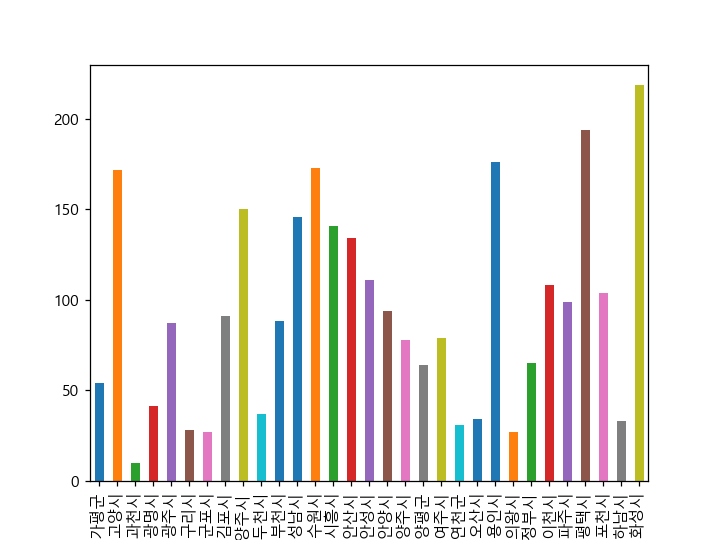

In [18]:
# (3) 사망자수의 합계로 차트 만들기

fil_1.groupby('발생지시군구')['사망자수'].sum().plot(kind='bar')

In [27]:
# (4) 경기도 내에서 사망자 순 5개 지역 추출
fil_1.groupby('발생지시군구')['사망자수'].sum().sort_values(ascending=False).iloc[:5]

발생지시군구
화성시    219
평택시    194
용인시    176
수원시    173
고양시    172
Name: 사망자수, dtype: int64